In [30]:
import torch
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
import tarfile
from torchvision.datasets.utils import download_url

In [5]:
dataset_url = "http://files.fast.ai/data/cifar10.tgz"
download_url(dataset_url, '.')

In [6]:
with tarfile.open('./cifar10.tgz', 'r:gz') as tar:
    tar.extractall(path='./data')

In [7]:
data_dir = "./data/cifar10"

In [8]:
import os

classes = os.listdir(data_dir + "/train")

In [9]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [12]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [21]:
dataset = ImageFolder(data_dir+"/train", transform=ToTensor())

(tensor([[[0.8588, 0.8588, 0.8627,  ..., 0.8510, 0.8471, 0.8392],
          [0.8667, 0.8667, 0.8745,  ..., 0.8588, 0.8549, 0.8471],
          [0.8667, 0.8667, 0.8745,  ..., 0.8588, 0.8549, 0.8471],
          ...,
          [0.8980, 0.9020, 0.9098,  ..., 0.8980, 0.8902, 0.8863],
          [0.8471, 0.8549, 0.8706,  ..., 0.8980, 0.8902, 0.8824],
          [0.7608, 0.7490, 0.7725,  ..., 0.8980, 0.8902, 0.8824]],
 
         [[0.9333, 0.9333, 0.9373,  ..., 0.9176, 0.9137, 0.9059],
          [0.9412, 0.9412, 0.9490,  ..., 0.9294, 0.9216, 0.9137],
          [0.9412, 0.9412, 0.9490,  ..., 0.9255, 0.9216, 0.9137],
          ...,
          [0.9608, 0.9569, 0.9569,  ..., 0.9412, 0.9412, 0.9412],
          [0.9020, 0.9098, 0.9255,  ..., 0.9412, 0.9412, 0.9373],
          [0.8157, 0.8039, 0.8275,  ..., 0.9412, 0.9412, 0.9373]],
 
         [[0.9608, 0.9608, 0.9647,  ..., 0.9490, 0.9412, 0.9412],
          [0.9686, 0.9686, 0.9765,  ..., 0.9608, 0.9529, 0.9490],
          [0.9686, 0.9686, 0.9765,  ...,

In [23]:
print(dataset.classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


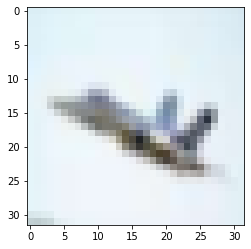

In [27]:
img, label = dataset[0]
plt.imshow(img.permute(1,2,0)) # 3x32x32 -> 32x32x3

In [32]:
def split_indices(n, val_pct=0.1, seed=99):
    n_val = int(val_pct*n)
    np.random.seed(seed)
    idxs = np.random.permutation(n)
    return idxs[n_val: ], idxs[ :n_val]

In [40]:
train_indices, val_indices = split_indices(len(dataset), 0.2, 42)

In [41]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [50]:
batch_size = 128

In [43]:
train_sampler = SubsetRandomSampler(train_indices)
train_dl = DataLoader(dataset,
                     batch_size,
                     sampler=train_sampler)
val_sampler = SubsetRandomSampler(val_indices)
val_dl = DataLoader(dataset,
                     batch_size,
                     sampler=val_sampler)

In [48]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(10, 10))
        ax.set_xticks([]);ax.set_yticks([])
        ax.imshow(make_grid(images, 10).permute(1,2,0))
        break
    

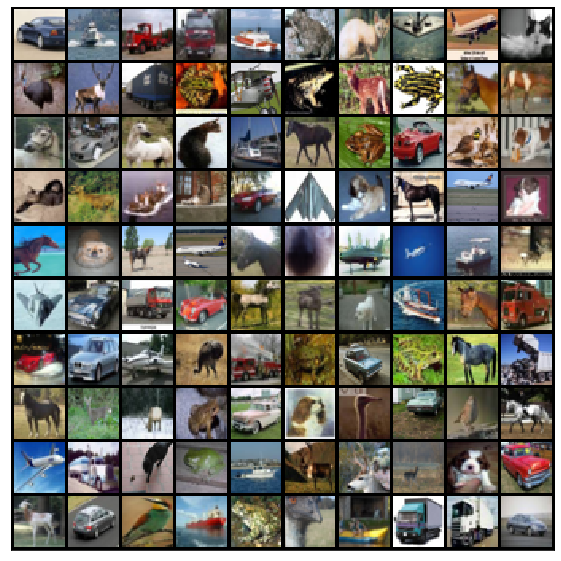

In [49]:
show_batch(train_dl)

In [51]:
import torch.nn as nn
import torch.nn.functional as F

In [52]:
model = nn.Sequential(
    nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    
    nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    
    nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    
    nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    
    nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    
    nn.Flatten(),
    nn.Linear(16, 10)
)

In [57]:
model

Sequential(
  (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU()
  (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (9): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (10): ReLU()
  (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (12): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU()
  (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (15): Flatten()
  (16): Linear(in_features=16, out_features=10, bias=True)
)

In [61]:
device = torch.device('cuda')

In [62]:
def to_device(data, device):
    if isinstance(data, (list, tuple)):
        return [ to_device(x, device) for x in data ]
    return data.to(device, non_blocking=True)

#Batch wise loading of data into gpu
class DeviceDataLoader():
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        for b in self.dl:
            yield to_device(b, self.device)
            
    def __len__(self):
        return len(self.dl)

In [64]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
to_device(model, device)

Sequential(
  (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU()
  (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (9): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (10): ReLU()
  (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (12): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU()
  (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (15): Flatten()
  (16): Linear(in_features=16, out_features=10, bias=True)
)

In [65]:
def loss_batch(model, loss_fn, xb, yb, opt=None, metric=None):
    preds = model(xb)
    loss = loss_fn(preds, yb)
    
    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()
        
    metric_res = None
    if metric is not None:
        metric_res = metric(preds, yb)
        
    return loss.item(), len(xb), metric_res

In [108]:
def evaluate(model, loss_fn, valid_dl, metric=None):
    with torch.no_grad():
        results = [ loss_batch(model, loss_fn, xb, yb, metric=metric) for xb,yb in valid_dl ]
        losses, nums, metrics = zip(*results)
        total = np.sum(nums)
        avg_loss = np.sum(np.multiply(losses, nums)) / total
        avg_metric = None
        if metric is not None:
            avg_metric = np.sum(np.multiply(metrics, nums)) / total
        
    return avg_loss, total, avg_metric

In [114]:
def fit(epochs, lr, model, loss_fn, train_dl, val_dl, metric=None, opt_fn=None):
    losses, metrics = [], []
    print(model)
    if opt_fn is None: opt_fn = torch.optim.Adam
    opt = opt_fn(model.parameters(), lr=lr)
    
    for epoch in range(epochs):
        
        for xb, yb in train_dl:
            loss, _ ,_ = loss_batch(model, loss_fn, xb, yb, opt)
        
        result = evaluate(model, loss_fn, val_dl, metric)
        val_loss, total, val_metric = result
        
        losses.append(val_loss)
        metrics.append(val_metric)
        
        if metric is None:
            print("Epoch [{}], val_loss: {:.4f}".format(epoch+1, result['val_loss']))
        else:
            print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result[0], result[2]))

    return loss, len(xb), result[2]

In [115]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [116]:
num_epochs = 20
opt_fn = torch.optim.Adam
lr = 0.005

In [ ]:
history = fit(num_epochs, lr, model, F.cross_entropy, train_dl, val_dl, accuracy, opt_fn)
train_losses, val_losses, val_metrics = history

Sequential(
  (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU()
  (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (9): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (10): ReLU()
  (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (12): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU()
  (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (15): Flatten()
  (16): Linear(in_features=16, out_features=10, bias=True)
)
Epoch [0], val_loss: 1.1646, val_acc: 0.5824
Epoch [1], val_

In [ ]:
model.parameters()

(1.1567126512527466, 100)